In [2]:
from astropy.io import fits
from astropy.table import Table, Column, join
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from matplotlib.colors import LogNorm
import astropy.units as u
from astropy.convolution import Gaussian2DKernel,Tophat2DKernel,Gaussian1DKernel
from astropy.convolution import convolve, convolve_fft
from astropy.coordinates import SkyCoord
import glob
import os
from astropy.visualization import ZScaleInterval
import matplotlib.ticker as ticker

from matplotlib.gridspec import GridSpec
from astropy.visualization import (MinMaxInterval, SqrtStretch, ImageNormalize)
from astropy.table import Table
import astropy.constants as const
import astropy.units as u
import numpy as np
from scipy.optimize import curve_fit
import re
from matplotlib.patches import Circle
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u
from scipy.interpolate import griddata

def angular_to_physical_radius(theta_arcsec, redshift):

    ang_diameter_distance = cosmo.angular_diameter_distance(redshift)  # in Mpc
    theta_radian = (theta_arcsec * u.arcsec).to(u.rad).value  # Convert arcsec to radian
    physical_radius = ang_diameter_distance.to(u.kpc) * theta_radian  # Convert Mpc to kpc
    
    return physical_radius.value



# import sigma_clipping
from astropy.stats import sigma_clip,sigma_clipped_stats


plt.style.use('../paper.mplstyle')

Duplicate key in file '../paper.mplstyle', line 23 ('axes.linewidth : 1.5')


In [3]:
Maioline_2024_MBH =       np.array([7.5 , 7.25, 7.36, 6.82, 7.13, 7.3 , 7.71, 6.86, 7.22, 6.56, 7.69, 7.9, 6.2])
Maioline_2024_Lbol = np.array([  44.3, 44.6, 44.8, 44.0, 44.5, 44.7, 44.7, 44.5, 44.8, 44.2, 44.1, 45.6, 45.0])
Maioline_2024_MBH_errup = np.array([0.31, 0.31, 0.32, 0.38, 0.31, 0.31, 0.3 , 0.35, 0.31, 0.32, 0.32, 0.3, 0.3])
Maioline_2024_MBH_errlow =np.array([0.31, 0.31, 0.12, 0.33, 0.31, 0.31, 0.3 , 0.34, 0.31, 0.31, 0.31, 0.3, 0.3])
Maioline_2024_logsigma =     np.array([1.93, 1.90, 1.95, 1.92, 1.96, 1.93, 1.64, 1.95, 1.85, 1.87, 1.77, 1.91, np.nan])
Maioline_2024_logsigma_errup=np.array([0.05, 0.06, 0.05, 0.06, 0.05, 0.06, 0.11, 0.06, 0.07, 0.07, 0.09, 0.06, np.nan])
Maioline_2024_logsigma_errlow=np.array([0.06, 0.07, 0.06, 0.06, 0.06, 0.07, 0.15, 0.07, 0.09, 0.08, 0.11, 0.06, np.nan])
Maioline_2024_Mstar =        np.array([8.88, 8.45, 8.34, 8.38, 7.79, 8.06, 9.78, 7.87, 8.11, 8.12, 10.18, 10.66, 8.9])
Maioline_2024_Mstar_errup =  np.array([0.66, 0.03, 0.20, 0.11, 0.3 , 0.7 , 0.2 , 0.16, 0.92, 0.12, 0.13,  0.09 , 0.2])
Maioline_2024_Mstar_errlow = np.array([0.66, 0.03, 0.20, 0.15, 0.3 , 0.7 , 0.2 , 0.28, 0.92, 0.13, 0.12,  0.1 , 0.3])
Maioline_2024_Mdyn =         np.array([9.23 ,8.84 ,np.nan,np.nan,9.81,np.nan,9.28,np.nan,8.92,9.27,np.nan,9.56,np.nan])
Maioline_2024_Mdyn_errup =   np.array([0.10 ,0.11 ,np.nan,np.nan,0.10,np.nan,0.21,np.nan,0.22,0.14,np.nan,0.13,np.nan])
Maioline_2024_Mdyn_errlow =  np.array([0.13 ,0.15 ,np.nan,np.nan,0.14,np.nan,0.41,np.nan,0.46,0.20,np.nan,0.18,np.nan])


# MBH 值（单位：Msun）
H24_MBH =           [3.2e7, 2.3e6, 3.7e6, 5.8e7, 1.9e7, 5.0e7, 4.2e7, 1.0e7, 9.8e7, 1.8e7]
H24_MBH_err_plus =  [0.3e7, 0.1e6, 0.2e6, 1.5e7, 0.8e7, 1.7e7, 1.2e7, 0.8e7, 4.4e7, 1.0e7]
H24_MBH_err_minus = [0.2e7, 0.1e6, 0.3e6, 1.3e7, 0.5e7, 1.3e7, 1.0e7, 0.5e7, 3.2e7, 0.6e7]
H24_Lbol =          np.array([1.9e45, 1.1e45, 9.1e44, 1.1e46, 4.8e45, 4.3e45, 2.8e45, 2.8e45, 7.1e44, 1.8e44])
H24_Lbol_err_plus = np.array([3.8e45, 6.1e45, 1.38e45, 0.1e46, 7.2e45, 0.4e45, 2.3e45, 1.42e46, 5.18e45, 0.26e45])
H24_Lbol_err_minus =np.array([0.6e45, 0.9e45, 0.71e45, 0.2e46, 3.6e45, 1.4e45, 1.4e45, 0.22e46, 0.43e45, 0.05e45])
# 主值
H24_logLbol = np.log10(H24_Lbol)
H24_logLbol_err_plus  = np.log10(H24_Lbol + H24_Lbol_err_plus)  - H24_logLbol
H24_logLbol_err_minus = H24_logLbol  - np.log10(H24_Lbol - H24_Lbol_err_minus)
H24_logMstar =           [8.63, 8.82, 9.10, 9.11, 9.92, 9.01, 9.35, 9.36, 9.61, 8.94]
H24_logMstar_err_plus =  [0.63, None, 0.31, None, 0.51, None, None, 0.36, 0.77, 0.29]
H24_logMstar_err_minus = [1.03, None, 0.37, None, 0.68, None, None, 0.45, 1.18, 0.54]
# 将 MBH 转为 log10(MBH)
H24_logMBH = np.log10(H24_MBH)
H24_logMBH_err_plus = [np.log10(m + e) - np.log10(m) for m, e in zip(H24_MBH, H24_MBH_err_plus)]
H24_logMBH_err_minus = [np.log10(m) - np.log10(m - e) for m, e in zip(H24_MBH, H24_MBH_err_minus)]

greene_logMBH =        [8.0, 7.3, 8.1, 8.17, 7.5, 7.4, 8.4, 7.7, 8.9]
greene_logMBH_err =    [0.3, 0.2, 0.2, 0.42, 0.2, 0.2, 0.5, 0.4, 0.1]
greene_logLbol =       [45.4, 45.0, 45.4, 45.8, 44.2, 44.8, 45.3, 45.3, 46.4]
greene_logLbol_err_plus  = [0.3, 0.1, 0.2, 0.3, 0.4, 0.4, 0.5, 0.5, 0.2]
greene_logLbol_err_minus = [0.3, 0.1, 0.2, 0.1, 0.4, 0.4, 0.5, 0.5, 0.2]

KH13_bulges = Table.read('../literature_data/ar4-bulges.fits')
KH13_ellipticals = Table.read('../literature_data/ar4-ellipticals.fits')
KH13_bulges_Mdyn = KH13_bulges['col16']
KH13_bulges_Mdyn_err = KH13_bulges['col17']
KH13_bulges_sigma = KH13_bulges['col22']
KH13_bulges_sigma_err = KH13_bulges['col23']
KH13_bulges_MBH = KH13_bulges['col19']
KH13_bulges_MBH_eup = KH13_bulges['col20']
KH13_bulges_MBH_elow = KH13_bulges['col21']
KH13_ellipticals_Mdyn = KH13_ellipticals['col10']
KH13_ellipticals_Mdyn_err = KH13_ellipticals['col12']
KH13_ellipticals_sigma = KH13_ellipticals['col17']
KH13_ellipticals_sigma_err = KH13_ellipticals['col19']
KH13_ellipticals_MBH = KH13_ellipticals['col14']
KH13_ellipticals_MBH_eup = KH13_ellipticals['col15']
KH13_ellipticals_MBH_elow = KH13_ellipticals['col16']



In [ ]:
sdss_cat = Table.read('/Volumes/8T/catalog/dr16q_prop_May16_2023.fits')


sdss_cat.keys()
Z_FIT = sdss_cat['Z_FIT']
mask = (Z_FIT < 3)   * (sdss_cat['LOGMBH'] > 5 ) * (sdss_cat['LOGLBOL'] > 40)
LOGMBH_highz = sdss_cat['LOGMBH'][mask]
LOGLBOL_highz = sdss_cat['LOGLBOL'][mask]
LOGMBH_lowz = sdss_cat['LOGMBH'][~mask]
LOGLBOL_lowz = sdss_cat['LOGLBOL'][~mask]


from sklearn.neighbors import KernelDensity


def get_contour(x, y):
    xy = np.vstack([x, y]).T
    # 使用 scikit-learn 的 KernelDensity
    kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
    kde.fit(xy)
    # 创建网格
    xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    xy_grid = np.vstack([xi.flatten(), yi.flatten()]).T

    # 计算每个网格点的密度
    zi = np.exp(kde.score_samples(xy_grid))

    sorted_zi = np.sort(zi.flatten())  # 将数据展平并排序
    cumulative = np.cumsum(sorted_zi)  # 累计求和，得到 CDF
    cumulative /= cumulative[-1]       # 归一化到 [0, 1] 范围

    # 找到 0.95, 0.68, 0.35 对应的值
    level_95 = sorted_zi[np.searchsorted(cumulative, 1 - 0.95)]
    level_68 = sorted_zi[np.searchsorted(cumulative, 1 - 0.68)]
    level_35 = sorted_zi[np.searchsorted(cumulative, 1 - 0.35)]
    return  xi, yi, zi, level_95, level_68,level_35

xi_highz, yi_highz, zi_highz, level_95_highz, level_68_highz,level_35_highz = get_contour(LOGMBH_highz, LOGLBOL_highz)
contour = plt.contour(xi_highz, yi_highz, zi_highz.reshape(xi_highz.shape), levels=[level_95_highz, level_68_highz,level_35_highz ], 
            linewidths=[1.4, 1.4, 1.4], colors=["black", "black", "black"],
            linestyles=["-", "--", "-."])

xi_lowz, yi_lowz, zi_lowz, level_95_lowz, level_68_lowz,level_35_lowz = get_contour(LOGMBH_lowz, LOGLBOL_lowz)
contour = plt.contour(xi_lowz, yi_lowz, zi_lowz.reshape(xi_lowz.shape), levels=[level_95_lowz, level_68_lowz,level_35_lowz ], 
            linewidths=[1.4, 1.4, 1.4], colors=["blue", "blue", "blue"],
            linestyles=["-", "--", "-."])

# contour_lines = contour.collections[0].get_paths()

# # Determine points outside the contour
# outside_points = []
# for i in range(len(x)):
#     point = (x[i], y[i])
#     is_inside = any(line.contains_point(point) for line in contour_lines)
#     if not is_inside:
#         outside_points.append(i)
# plt.scatter(x[outside_points], y[outside_points], c='red', s=1)
highz_qso = Table.read('../catalog/aa61_fan_qso_database.csv')
highz_qso = highz_qso[1:]
BHmass = np.array([float(i) if i!='--' else 0 for i in highz_qso['BHmass']])
L3000 = np.array([float(i) if i!='--' else 0 for i in highz_qso['L3000']])
mask = (BHmass != 0) * (L3000 != 0)

pl_MBH = BHmass[mask] * 1e8
pl_L3000= L3000[mask] * 1e46
pl_Lbol = 5.15 * pl_L3000

KeyboardInterrupt: 

NameError: name 'xi_highz' is not defined

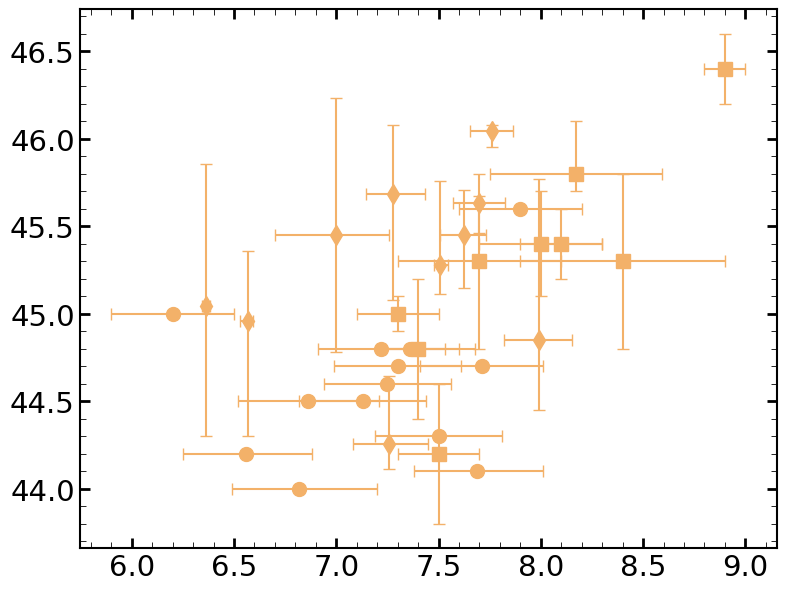

In [4]:
from matplotlib.tri import Triangulation

ID = 8219

save_path = f'../BL_simulation/{ID}_revised_2/'
detection_matrix = np.load(save_path + 'detection_matrix.npy')
detection_matrix2 = np.load(save_path + 'detection_matrix2.npy') 
detection_matrix22 = np.load(save_path + 'detection_matrix22.npy')
detection_matrix3 = np.load(save_path + 'detection_matrix3.npy')
# logMBH_list = np.linspace(5, 9, 100)
# logλEdd_list = np.linspace(-3, 1.5, 100)
logMBH_list = np.linspace(5, 9, 120)
logλEdd_list = np.linspace(-3, 1.5, 120)


fig = plt.figure(figsize=(9, 7))

# #000080
lrdcolor = '#F3B169'  #lrdcolor
plt.errorbar(Maioline_2024_MBH, Maioline_2024_Lbol, markerfacecolor=lrdcolor, markeredgecolor=lrdcolor,
            xerr=[Maioline_2024_MBH_errlow, Maioline_2024_MBH_errup], fmt='o', color=lrdcolor, label='Maiolino+2025', markersize=10, capsize=4)

plt.errorbar(H24_logMBH, H24_logLbol, markerfacecolor=lrdcolor, markeredgecolor=lrdcolor,
            xerr=[H24_logMBH_err_minus, H24_logMBH_err_plus], yerr = [H24_logLbol_err_minus, H24_logLbol_err_plus], fmt='d', color=lrdcolor, label='Harikane+2023', markersize=10, capsize=4)
plt.errorbar(greene_logMBH, greene_logLbol, markerfacecolor=lrdcolor, markeredgecolor=lrdcolor,
            xerr=[greene_logMBH_err, greene_logMBH_err], yerr = [greene_logLbol_err_minus, greene_logLbol_err_plus], fmt='s', color=lrdcolor, label='Greene+2024', markersize=10, capsize=4)

logBH = [8.51, 8.91]
logBHerr = [0.5, 0.5]
logLbol = np.array([12.47, 13.08]) + np.log10(const.L_sun.to(u.erg/u.s).value)
logLbolerr = [0.5, 0.5]
# plt.errorbar(logBH, logLbol, xerr=logBHerr, yerr = [logLbolerr], #xerr=[logM_err_intrinsic ,logM_err_intrinsic ], 
#              fmt='*', color='red', label='The Forges', markersize=25, capsize=6, capthick=1.5)

# 生成 logMBH 范围
logMBH_grid = np.linspace(4, 12, 200)  # 6-9 dex，自己按需要调整

# Eddington luminosity log10
logLedd = np.log10(1.26e38) + logMBH_grid  # log10(L_Edd)
            


#xi_highz, yi_highz, zi_highz, level_95_highz, level_68_highz,level_35_highz = get_contour(LOGMBH_highz, LOGLBOL_highz)
contour = plt.contour(xi_highz, yi_highz, zi_highz.reshape(xi_highz.shape), levels=[level_95_highz, level_68_highz,level_35_highz ], 
            linewidths=[1.4, 1.4, 1.4], colors=["black", "black", "black"],
            linestyles=["-", "--", "-."])

#xi_lowz, yi_lowz, zi_lowz, level_95_lowz, level_68_lowz,level_35_lowz = get_contour(LOGMBH_lowz, LOGLBOL_lowz)
# contour = plt.contour(xi_lowz, yi_lowz, zi_lowz.reshape(xi_lowz.shape), levels=[level_95_lowz, level_68_lowz,level_35_lowz ], 
#             linewidths=[1.4, 1.4, 1.4], colors=["gray", "gray", "gray"],
#             linestyles=["-", "--", "-."])

ax = plt.gca()
MBH_grid, lam_grid = np.meshgrid(logMBH_list, logλEdd_list, indexing='ij')  # shapes (M, N)
logLedd_grid = np.log10(1.26e38) + MBH_grid
logLbol_grid = lam_grid + logLedd_grid  # shape (M, N)
X = MBH_grid.ravel()          # logMBH for each point
Y = logLbol_grid.ravel()      # corresponding logL_bol for each point
Z = detection_matrix.ravel()  # detection fraction flattened
xg = np.linspace(logMBH_list.min(), logMBH_list.max(), 200)
yg = np.linspace(Y.min(), Y.max(), 200)
Xg, Yg = np.meshgrid(xg, yg)

# # 插值 detection fraction 到规则网格（method='linear' 或 'cubic'）
Zg = griddata((X, Y), Z, (Xg, Yg), method='linear')

# 条件掩膜：右下角 (X 比 max(X) 大) 且 (Y 比 min(Y) 小)
mask_right_bottom = (Xg > 6.3) & (Yg < 45.8)
Zg[mask_right_bottom & np.isnan(Zg)] = 0.0

pcm = ax.pcolormesh(xg, yg, Zg, shading='gouraud', cmap='coolwarm', vmin=0, vmax=1, edgecolors='none')  # 关键：去掉格子边框)
plt.colorbar(pcm, ax=ax, label='Broad Line Detection Probability')

x1, y1 = 5, 44.2
x2, y2 = 5.9, 43.6
m = (y2 - y1) / (x2 - x1)  # 斜率
b = y1 - m * x1            # 截距

# mask = (Zg < 0.01)
# masked_array = np.where(mask, 1, np.nan)
# cs = ax.contourf(Xg, Yg, masked_array, levels=[0.5, 1,  1.5],
#                  colors='none', alpha=1)

# mask = (Yg > 44) & (Yg > (m * Xg + b)) & (Zg < 0.1) & (Xg < 8)
# masked_array = np.where(mask, 1, np.nan)
# cs = ax.contourf(Xg, Yg, masked_array, levels=[0.5, 1,  1.5],
#                  colors='none', hatches=['///'], alpha=0.9)
# cs._hatch_color = (1.0, 1.0, 1.0, 0.4)



from random import sample
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.8  # 默认 1.0

# plt.scatter(
#     np.log10(pl_MBH), np.log10(pl_Lbol),
#     marker='o',        # 圆形标记
#     facecolors='none', # 空心
#     edgecolors='#4292C6', # 外边框颜色
#     s=60,              # 大小（可调）
#     linewidths=1.5,     # 边框粗细（可调）
#     label = 'Fan+2025, \n z > 5.3 quasar'
# )

logL = logLedd + np.log10(27.8)
# plt.plot(logMBH_grid, logL, ls='--', c='gray', lw=1)
# plt.plot(logMBH_grid, logL, ls='--', c='gray', lw=1)
# 用白色填充 logL 以上的区域
plt.fill_between(
    logMBH_grid, logL, y2=np.max(Yg),  # y2 设置成你的坐标轴上限
    color='white', alpha=1.0, zorder=1  # 不透明白色
)
# ax.scatter(5.8, 43.4, s=10000, facecolors='none', edgecolors='red', linewidths=2, zorder=10)



plt.text(8.2, 46.3, "SDSS z<3 AGN", color='black', fontsize=11, ha='center', va='bottom',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))
plt.text(8.45, 44.5, "JWST AGN", color=lrdcolor, fontsize=11, ha='center', va='bottom',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))

# plt.text(5.4, 46.5, "Region where Broad line width < 1000 km/s", color='black', fontsize=11, ha='center', va='bottom',
#             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))

# --- 标记 detection_matrix2 & 3 ---
mask2 = detection_matrix3.ravel()
mask3 = detection_matrix2.astype(bool).ravel() | detection_matrix22.astype(bool).ravel()

# 插值到同一网格
M2g = griddata((X, Y), mask2.astype(float), (Xg, Yg), method='nearest')
M3g = griddata((X, Y), mask3.astype(float), (Xg, Yg), method='nearest')
# 半透明填充
color1 = '#37AB78'
# ax.contourf(Xg, Yg, M2g, levels=[0.5, 1.5], colors=[color1 , color1 ], alpha=0.3)
ax.contourf(Xg, Yg, M3g, levels=[0.5, 1.5], colors=['none', 'cyan'], alpha=0.2)
# 边界线
ax.contour(Xg, Yg, M3g, levels=[0.5], colors='cyan', linewidths=2, linestyles='--', label='Matrix3==1')
# ax.contour(Xg, Yg, M2g, levels=[0.5], colors=color1 , linewidths=2, linestyles='-', label='Matrix2==1')

# text = "broad-line FWHM < 1000 km/s"
# wrapped_text = "\n".join(textwrap.wrap(text, width=20))  # width=20 表示大约20字符一行
# ax.text(4.2, 45.8, wrapped_text, color='black', fontsize=14, bbox=dict(facecolor='white', alpha=0.7, edgecolor='cyan', boxstyle='round,pad=0.2'))

# text = "broad-line FWHM < 1000 km/s"
# wrapped_text = "\n".join(textwrap.wrap(text, width=20))  # width=20 表示大约20字符一行
# ax.text(4.2, 45.8, wrapped_text, color='black', fontsize=14, bbox=dict(facecolor='white', alpha=0.7, edgecolor='cyan', boxstyle='round,pad=0.2'))


# 第一个 legend（比如是 scatter 的 label）
from matplotlib.patches import Patch
leg1 = ax.legend(fontsize=15, frameon=True, loc='upper left')
# 第二个 legend（专门为 contour 创建）
handles = [
    # Patch(facecolor='none', edgecolor='cyan', lw=2, ls='--', label= r'$\rm FWHM_{\rm broad, exp} $' + '\n < 1000 km/s'),
    Patch(facecolor='none', edgecolor='cyan', lw=2, ls='--', label= 'Excluded region' ),
    # Patch(facecolor='none', edgecolor=color1 , lw=2, ls='-', label='Hidden broad \n line')
]

leg2 = ax.legend(handles=handles, fontsize=15, frameon=True, loc='lower right')

# 关键：把第一个 legend 重新加回去
ax.add_artist(leg1)

y1 = 43.9
y2 = 43.3
x1, x2, x3 = 5.4, 6, 6.6
sample_point = [(4.9, 43.9), (x1, y1), (x2, y1), (x1, y2), (x2, y2), (x3, y2)]
# for point in sample_point:
#     plt.scatter([point[0]], [point[1]], color='red', marker='d', s=40, zorder = 10)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

# Edd ratios we want to plot
edd_ratios = [10, 1, 0.1, 0.01]
colors = ['red', 'orange', 'green', 'blue']
label_inits = [5.3 , 5.1, 5.2, 6]
for r, c, label_init in zip(edd_ratios, colors, label_inits):
    logL = logLedd + np.log10(r)
    plt.plot(logMBH_grid, logL, ls='--', c='black', lw=1)

    # 在右端加标注
    x_text = label_init
    y_text = label_init + np.log10(1.26e38)  + np.log10(r)
    # y_text = logL[-1]
    # 计算斜率，转成角度
    dx = logMBH_grid[-1] - logMBH_grid[-10]
    dy = logL[-1] - logL[-10]
    angle = np.degrees(np.arctan2(dy, dx)) - 14
    plt.text(x_text, y_text, r"$\lambda_{{\rm Edd}}$" + f" = {r}",
            rotation=angle, rotation_mode='anchor',
            va='bottom', ha='left', fontsize=14, color='black')

            
plt.xlim(5, 9)
plt.ylim(42, 48)
plt.ylabel(r'$\log L_{\rm bol}~(\rm erg~s^{-1})$')
plt.xlabel(r'$\log M_{\rm BH}~(\rm M_{\odot})$')
# plt.savefig('/Users/zijianzhang/Documents/Proposals/JWST_narrow_line_LRDs/Figures/LBH_Lbol2.png', dpi=300, bbox_inches='tight')

Lambda_Edd = 1 与 cyan 区域边界的交点：
x = 5.908, y = 44.009
x = 7.201, y = 45.301
Lambda_Edd = 1 与 cyan 区域边界的交点：
x = 6.001, y = 44.102
x = 7.201, y = 45.301
Lambda_Edd = 1 与 cyan 区域边界的交点：
x = 5.695, y = 43.795
x = 7.201, y = 45.301
Lambda_Edd = 1 与 cyan 区域边界的交点：
x = 5.609, y = 43.710
x = 7.201, y = 45.301
Lambda_Edd = 1 与 cyan 区域边界的交点：
x = 5.524, y = 43.624
x = 7.201, y = 45.301


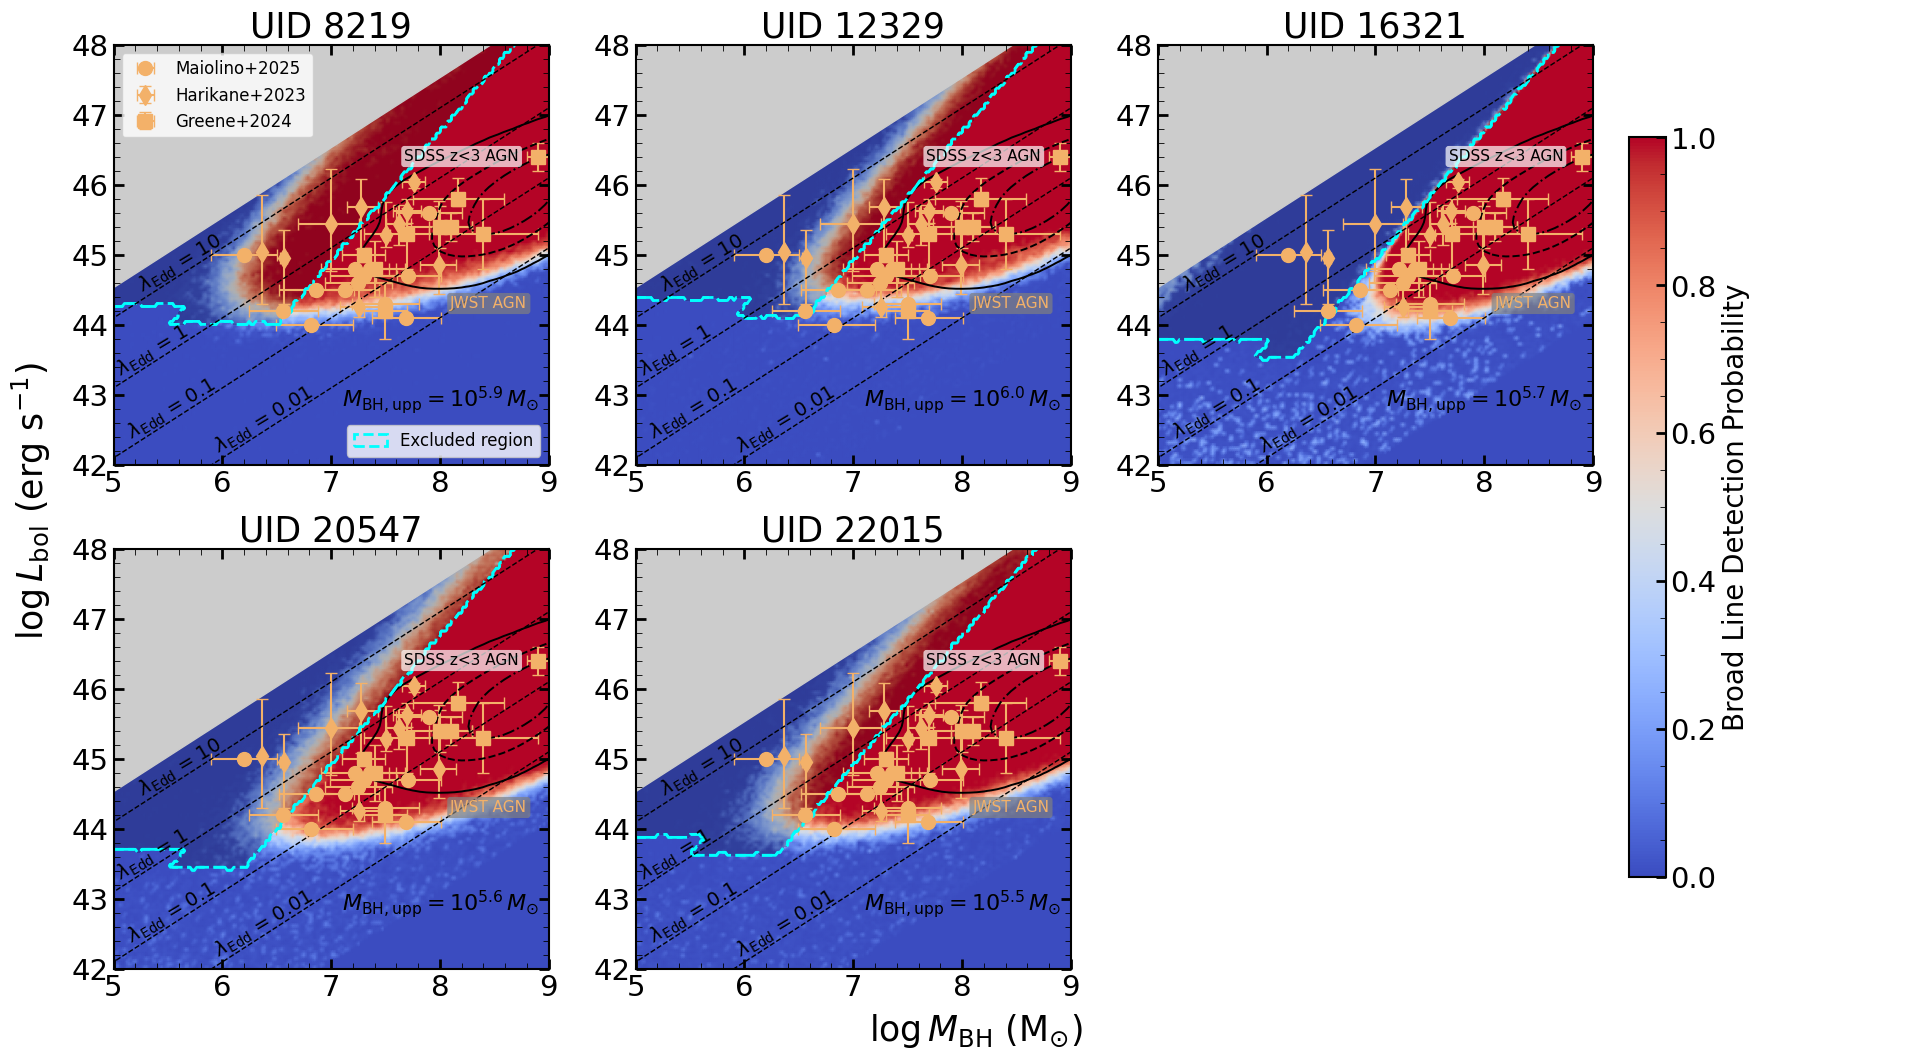

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib as mpl
from matplotlib.patches import Patch
import textwrap
import warnings

warnings.filterwarnings("ignore")
mpl.rcParams['hatch.linewidth'] = 0.8  # 你之前设置过

def plot_one_id(ID, ax):
    """
    在给定 ax 上完整绘制单个 ID 的图（保留你原始代码的元素）。
    返回：pcm (QuadMesh) 或 None（用于 colorbar）
    """
    save_path = f'../BL_simulation/{ID}_revised_2/'

    # ---- load matrices ----
    detection_matrix = np.load(save_path + 'detection_matrix.npy')
    detection_matrix2 = np.load(save_path + 'detection_matrix2.npy') 
    detection_matrix22 = np.load(save_path + 'detection_matrix22.npy')
    detection_matrix3 = np.load(save_path + 'detection_matrix3.npy')

    # lists / grids
    logMBH_list = np.linspace(5, 9, 120)
    logλEdd_list = np.linspace(-3, 1.5, 120)

    # ---------- plot the observational points if exist ----------
    # 这些变量若不存在会跳过（你可以在全局定义它们或在函数里读取）
    try:
        # example: Maioline_2024_MBH etc. 如果没有，会进入 except
        lrdcolor = '#F3B169'
        ax.errorbar(Maioline_2024_MBH, Maioline_2024_Lbol,
                    markerfacecolor=lrdcolor, markeredgecolor=lrdcolor,
                    xerr=[Maioline_2024_MBH_errlow, Maioline_2024_MBH_errup],
                    fmt='o', color=lrdcolor, label='Maiolino+2025', markersize=10, capsize=4)

        ax.errorbar(H24_logMBH, H24_logLbol,
                    markerfacecolor=lrdcolor, markeredgecolor=lrdcolor,
                    xerr=[H24_logMBH_err_minus, H24_logMBH_err_plus],
                    yerr=[H24_logLbol_err_minus, H24_logLbol_err_plus],
                    fmt='d', color=lrdcolor, label='Harikane+2023', markersize=10, capsize=4)

        ax.errorbar(greene_logMBH, greene_logLbol,
                    markerfacecolor=lrdcolor, markeredgecolor=lrdcolor,
                    xerr=[greene_logMBH_err, greene_logMBH_err],
                    yerr=[greene_logLbol_err_minus, greene_logLbol_err_plus],
                    fmt='s', color=lrdcolor, label='Greene+2024', markersize=10, capsize=4)
    except Exception as e:
        # 如果这些数据不存在，不中断绘图
        # print(f"Warning: observational points missing for ID {ID}: {e}")
        pass

    # ---------- compute MBH / Lbol grids ----------
    MBH_grid, lam_grid = np.meshgrid(logMBH_list, logλEdd_list, indexing='ij')  # shapes (M, N)
    logLedd_grid = np.log10(1.26e38) + MBH_grid
    logLbol_grid = lam_grid + logLedd_grid  # shape (M, N)

    X = MBH_grid.ravel()
    Y = logLbol_grid.ravel()
    Z = detection_matrix.ravel()
    if(ID == 16321):
        Z[Z<0.2] = Z[Z<0.2]**1.5
    Z[Z<0.1] = Z[Z<0.1]**1.5
    xg = np.linspace(logMBH_list.min(), logMBH_list.max(), 200)
    yg = np.linspace(Y.min(), Y.max(), 200)
    Xg, Yg = np.meshgrid(xg, yg)

    # 插值 detection fraction 到规则网格（method='linear'）
    Zg = griddata((X, Y), Z, (Xg, Yg), method='linear')

    # 填补右下角缺失值（保持你原逻辑）
    try:
        mask_right_bottom = (Xg > 6.3) & (Yg < 45.8)
        Zg[mask_right_bottom & np.isnan(Zg)] = 0.0
    except Exception:
        pass

    # pcolormesh（注意 X/Y 顺序与 griddata 输出一致）
    pcm = ax.pcolormesh(xg, yg, Zg, shading='gouraud', cmap='coolwarm', vmin=0, vmax=1, edgecolors='none')
    # colorbar 由外部统一添加

    # ---------- optional high-z contour (if variables exist) ----------
    try:
        # xi_highz, yi_highz, zi_highz and levels must exist in your workspace
        contour = ax.contour(xi_highz, yi_highz, zi_highz.reshape(xi_highz.shape),
                             levels=[level_95_highz, level_68_highz, level_35_highz],
                             linewidths=[1.4, 1.4, 1.4], colors=["black", "black", "black"],
                             linestyles=["-", "--", "-."])
    except Exception:
        # If not available, skip silently
        pass

    # ---------- white-out area above some logL (你原来的 fill_between) ----------
    try:
        logMBH_grid_plot = np.linspace(4, 12, 200)
        logL_line = logMBH_grid_plot + np.log10(1.26e38) + np.log10(27.8)  # 你原来写的 logL = logLedd + log10(27.8)
        ax.fill_between(logMBH_grid_plot, logL_line, y2=np.max(Yg), color='white', alpha=1.0, zorder=1)
    except Exception:
        pass

    # ---------- text labels ----------
    ax.text(8.2, 46.3, "SDSS z<3 AGN", color='black', fontsize=11, ha='center', va='bottom',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))
    ax.text(8.45, 44.2, "JWST AGN", color='#F3B169', fontsize=11, ha='center', va='bottom',
            bbox=dict(facecolor='gray', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))

    # ---------- mark detection_matrix2 & 3 (你的 contourf & contour) ----------
    mask2 = detection_matrix3.ravel()
    mask3 = detection_matrix2.astype(bool).ravel() | detection_matrix22.astype(bool).ravel()

    # 插值到同一网格（nearest）
    M2g = griddata((X, Y), mask2.astype(float), (Xg, Yg), method='nearest')
    M3g = griddata((X, Y), mask3.astype(float), (Xg, Yg), method='nearest')

    # 半透明填充（cyan）
    ax.contourf(Xg, Yg, M3g, levels=[0.5, 1.5], colors=['none', 'cyan'], alpha=0.2)
    # 边界线
    ax.contour(Xg, Yg, M3g, levels=[0.5], colors='cyan', linewidths=2, linestyles='--')
    # ======== 求 λEdd = 1 线与 cyan 区域边界的交点 ========
    C = np.log10(1.26e38)  # λEdd=1 的常数项
    
    # 画 M3g 边界时返回 contour 对象
    contour_boundary = ax.contour(Xg, Yg, M3g, levels=[0.5], colors='cyan', linewidths=2, linestyles='--')
    
    intersection_x = []
    intersection_y = []
    
    for collection in contour_boundary.collections:
        for path in collection.get_paths():
            v = path.vertices    # shape (N, 2), 每一条边界线的点
            xs = v[:, 0]
            ys = v[:, 1]
    
            # 计算 λEdd=1 线上的 y 值
            y_line = xs + C
    
            # 找符号变化（表示 contour 与 λEdd=1 线相交）
            diff = ys - y_line
            sign_change = np.where(np.diff(np.sign(diff)) != 0)[0]
    
            for idx in sign_change:
                # 在 [idx, idx+1] 之间线性插值求交点
                x1, y1 = xs[idx], ys[idx]
                x2, y2 = xs[idx+1], ys[idx+1]
    
                # 对两点构成的线段求与 λEdd=1 直线的交点
                # y = m*x + b, m=1, b=C
                # segment: y = y1 + (y2-y1)*t, x = x1 + (x2-x1)*t
                # 解 t
                t = ( (x1 + C) - y1 ) / ( (y2 - y1) - (x2 - x1) )
    
                xi = x1 + (x2 - x1) * t
                yi = y1 + (y2 - y1) * t
    
                intersection_x.append(xi)
                intersection_y.append(yi)
    
    # 输出结果
    print("Lambda_Edd = 1 与 cyan 区域边界的交点：")
    for xx, yy in zip(intersection_x, intersection_y):
        print(f"x = {xx:.3f}, y = {yy:.3f}")
    MBH_upp = min(intersection_x)
    ax.text(
    7.1, 42.7,
    rf"$M_{{\rm BH,upp}} = 10^{{{MBH_upp:.1f}}}\,M_{{\odot}}$",
    va='bottom', ha='left', fontsize=16, color='black'
)
    # ---------- sample points (if you want to show) - 你原来是注释掉的，我们保留注释形式 ----------
    # sample_point = [(4.9, 43.9), (x1, y1), (x2, y1), (x1, y2), (x2, y2), (x3, y2)]
    # colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
    # for point in sample_point:
    #     ax.scatter([point[0]], [point[1]], color='red', marker='d', s=40, zorder = 10)

    # ---------- Eddington ratio lines and rotated labels ----------
    logMBH_grid_full = np.linspace(4, 12, 200)
    edd_ratios = [10, 1, 0.1, 0.01]
    label_inits = [5.3 , 5.1, 5.2, 6]
    for r, label_init in zip(edd_ratios, label_inits):
        logL = logMBH_grid_full + np.log10(1.26e38) + np.log10(r)
        ax.plot(logMBH_grid_full, logL, ls='--', c='black', lw=1)

        # 在右端加标注（计算角度）
        dx = logMBH_grid_full[-1] - logMBH_grid_full[-10]
        dy = logL[-1] - logL[-10]
        angle = np.degrees(np.arctan2(dy, dx)) - 14
        x_text = label_init
        y_text = label_init + np.log10(1.26e38)  + np.log10(r)
        ax.text(x_text, y_text, r"$\lambda_{{\rm Edd}}$" + f" = {r}",
                rotation=angle, rotation_mode='anchor',
                va='bottom', ha='left', fontsize=14, color='black')

    if(ID == 8219):
        # ---------- legends ----------
        try:
            # 第一个 legend（如果存在 scatter/errorbar 标签）
            leg1 = ax.legend(fontsize=12, frameon=True, loc='upper left')
            # 第二个 legend（为 excluded region）
            handles = [
                Patch(facecolor='none', edgecolor='cyan', lw=2, ls='--', label='Excluded region'),
            ]
            leg2 = ax.legend(handles=handles, fontsize=12, frameon=True, loc='lower right')
            ax.add_artist(leg1)
        except Exception:
            pass

    # ---------- title and axis limits ----------
    ax.set_title(f'UID {ID}', fontsize=25)
    ax.set_xlim(5, 9)
    ax.set_ylim(42, 48)
    # ax.set_xlabel(r'$\log M_{\rm BH}~(\rm M_{\odot})$')
    # ax.set_ylabel(r'$\log L_{\rm bol}~(\rm erg~s^{-1})$')

    return pcm


# ================================
# 主程序：为 5 个 ID 画 2×3 subplot（最后一格空着）
# ================================
IDs = [8219, 12329, 16321, 20547, 22015]
fig, axes = plt.subplots(2, 3, figsize=(23, 12))
axes = axes.flatten()

pcm_refs = []
for i, ID in enumerate(IDs):
    pcm = plot_one_id(ID, axes[i])
    if pcm is not None:
        pcm_refs.append(pcm)

# 关闭最后一个空格
axes[-1].axis('off')

# 统一 x/y label（如果你不想重复每格 label，可以把 ax.set_xlabel/remove 上面的设置）
fig.text(0.5, 0.05, r'$\log M_{\rm BH}~(\rm M_{\odot})$', ha='center', fontsize=25)
fig.text(0.08, 0.5, r'$\log L_{\rm bol}~(\rm erg~s^{-1})$', va='center', rotation='vertical', fontsize=25)

# 公共 colorbar：用第一个有效 pcm
if len(pcm_refs) > 0:
    cbar = fig.colorbar(pcm_refs[-1], ax=axes[:-1], shrink=0.8, pad=0.02)
    cbar.set_label('Broad Line Detection Probability', fontsize=20)

plt.savefig( '../Figure/BL_simulation.pdf', dpi=300, bbox_inches='tight')
# plt.tight_layout()
plt.show()